# Plotting in Python with pandas & seaborn (last part)

Marco Chierici

May 16 & 30, 2023

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


### Boxplots

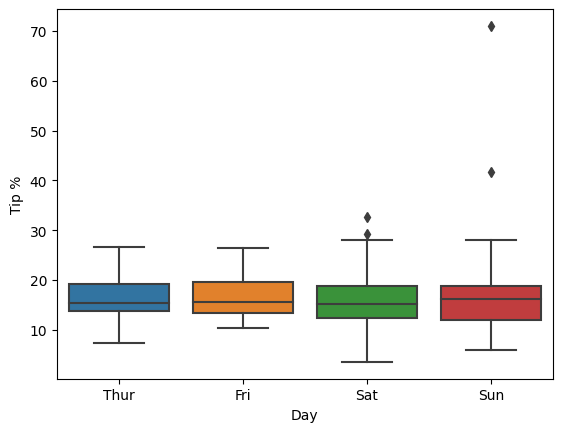

In [4]:
g = sns.boxplot(data=tips, x="day", y="tip_pct")
g.set(xlabel="Day", ylabel="Tip %");

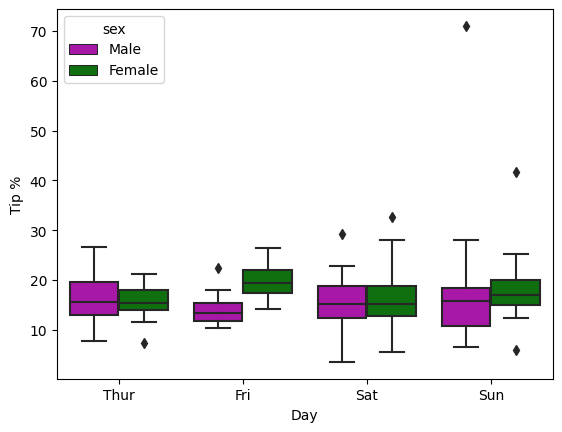

In [5]:
g = sns.boxplot(data=tips, x="day", y="tip_pct",
               hue="sex",
               palette=['m', 'g'])
g.set(xlabel="Day", ylabel="Tip %");

Alternatively, we can use the more flexible function `sns.catplot`:

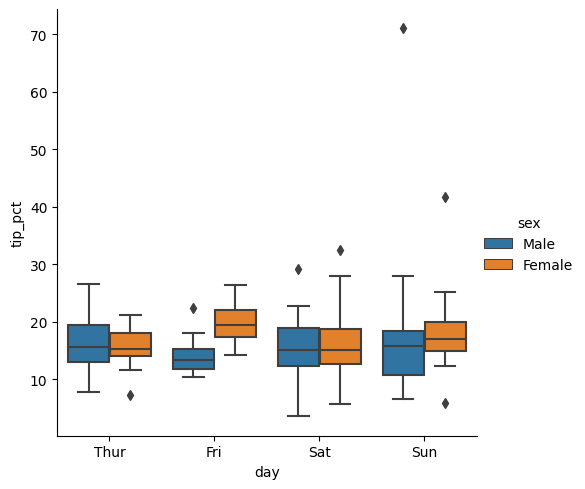

In [6]:
sns.catplot(data=tips, kind="box", x="day", y="tip_pct", hue="sex");

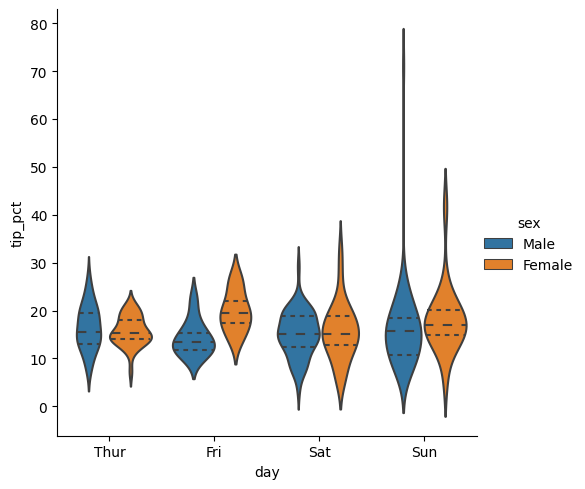

In [7]:
sns.catplot(data=tips, kind="violin", x="day", y="tip_pct", hue="sex", inner="quartile");

The function `catplot()` can also be used to generate categorical estimate plots such as bar or count plots (`kind="count"`).

We see here an example that visualizes the counts distribution of RMS Titanic survivors in relation to the passengers deck.

In [8]:
# Load Titanic Dataset
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


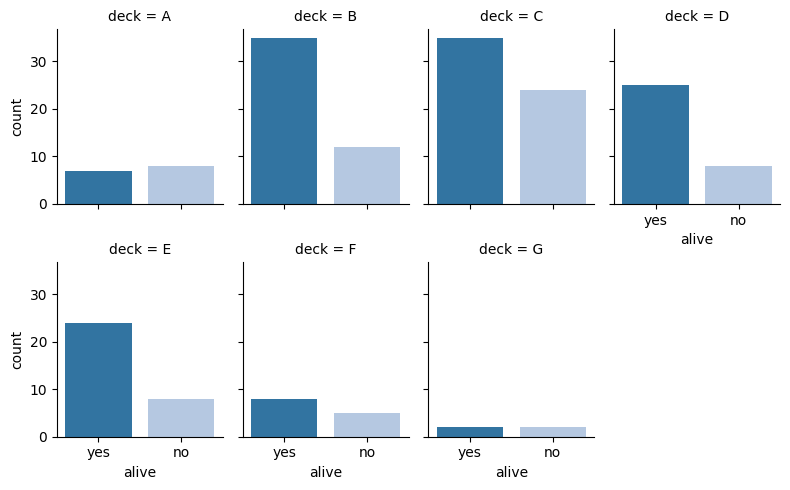

In [9]:
sns.catplot(
    x="alive",
    col="deck",
    col_wrap=4,
    data=titanic[titanic.deck.notnull()],
    kind="count",
    height=2.5,
    aspect=0.8,
    palette="tab20",
)

plt.show()

Another example on the Titanic dataset: this time we use `catplot` to show violin plots of passenger ages, grouped by the town where they embarked.

We also pass additional keyword arguments to the plot function (in this case, `violinplot`):

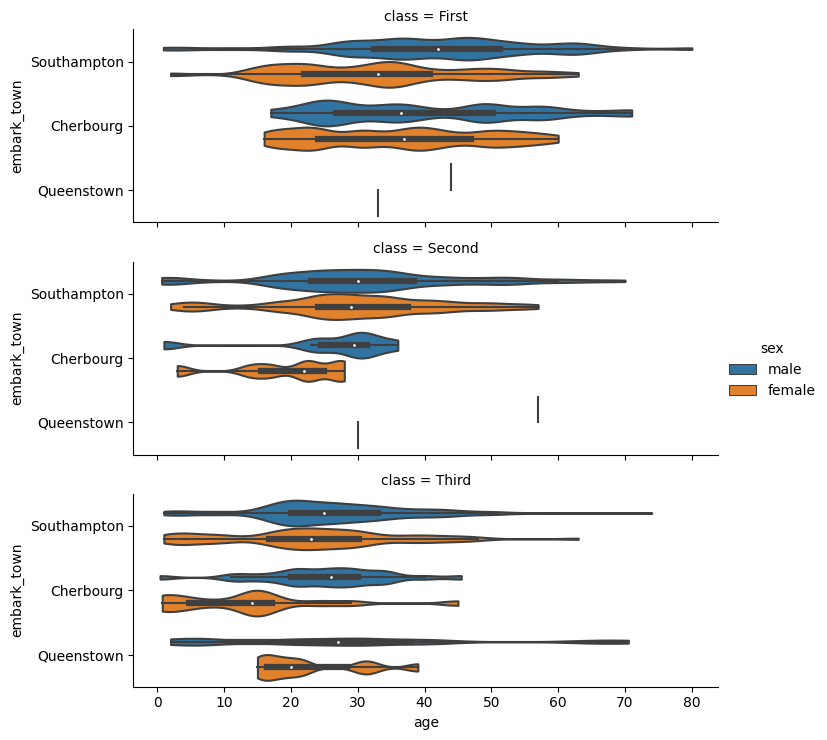

In [10]:
# Load Dataset
titanic = sns.load_dataset("titanic")

# Plot
sns.catplot(
    x="age",
    y="embark_town",
    hue="sex",
    col="class",
    data=titanic[titanic.embark_town.notnull()],
    col_wrap=1,
    orient="h",
    height=2.5,
    aspect=3,
    palette="tab10",
    kind="violin",
    dodge=True,
    cut=0, # limit the violin range within the range of the observed data
    bw=0.2, # scale factor to use when computing the kernel bandwidth
)

plt.show()

### Bar plots

Bar plots are drawn with `sns.barplot`, where you can group by a categorical variable and plot aggregated values with automatic confidence intervals:

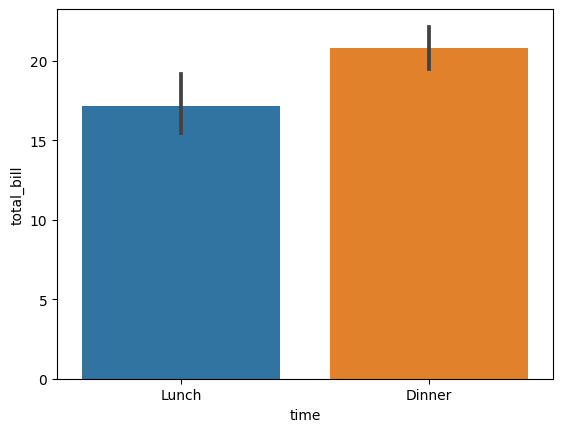

In [11]:
sns.barplot(data=tips, x="time", y="total_bill");

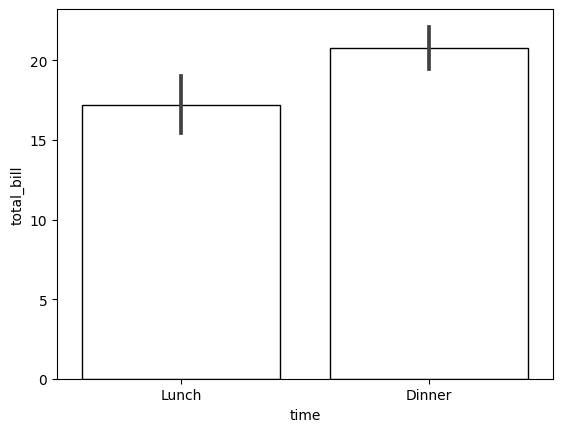

In [12]:
sns.barplot(data=tips, x="time", y="total_bill",
           facecolor="white",
           edgecolor="black");

A second grouping layer can be added with `hue`:

In [ ]:
sns.barplot(data=tips, x="time", y="total_bill", hue="sex");

The `errorbar` argument can be used to show standard deviation instead of confidence intervals:

In [ ]:
sns.barplot(data=tips, x="time", y="total_bill", hue="sex",
           errorbar="sd");

Horizontal bar plots are drawn simply changing the `x` and `y` arguments:

In [ ]:
sns.barplot(data=tips, y="time", x="total_bill", hue="sex",
           errorbar="sd")

### Scatterplots

In [ ]:
sns.scatterplot(tips, x="total_bill", y="tip");

Seaborn supports statistical estimation, for example of linear regression lines:

In [ ]:
sns.lmplot(tips, x="total_bill", y="tip");

Stratification by a third variable is supported by the argument `hue`:

In [ ]:
sns.scatterplot(tips, x="total_bill", y="tip", hue="time");

In [ ]:
sns.lmplot(tips, x="total_bill", y="tip", hue="time");

In [ ]:
sns.lmplot(tips, x="total_bill", y="tip", hue="time", col="smoker");